In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [3]:
df = pd.read_csv('recession_dataset.csv')
df.head()

,Date,GDP,GDP rate,Recession dates,Unemployment,Ind.Prod. index,DJI,SP500,T-bill,Housing starts,House price index,Consumer loans,Mortgage loans,CPI-U,Inflation rate,World GDP growth
0,1948-01-01,2239.682,6.2,0,3.4,4.8654,176.26,14.83,0.97,1362.0,11.211582,5.7786,8.8194,23.7,0.10233,0.0484
1,1948-02-01,2239.682,6.2,0,3.8,4.6504,168.47,14.10,1.00,1362.0,11.211582,5.9030,8.9518,23.5,0.09302,0.0484
2,1948-03-01,2239.682,6.2,0,4.0,4.5160,169.94,14.30,1.00,1362.0,11.211582,6.0272,9.0946,23.4,0.06849,0.0484
3,1948-04-01,2276.690,6.8,0,3.9,4.5966,180.05,15.40,1.00,1362.0,11.211582,6.1559,9.2382,23.8,0.08676,0.0484
4,1948-05-01,2276.690,6.8,0,3.5,4.6235,186.38,16.15,1.00,1362.0,11.211582,6.2822,9.3782,23.9,0.09132,0.0484


### Check target variable

Balanced or not

In [4]:
df['Recession dates'].value_counts()

Recession dates
0    791
1    124
Name: count, dtype: int64

The classes are unbalanced, so lated we'd need to address that with SMOTE or smth like that to balance it.

Set dates as indices, since it's time-series data.

In [5]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,GDP,GDP rate,Recession dates,Unemployment,Ind.Prod. index,DJI,SP500,T-bill,Housing starts,House price index,Consumer loans,Mortgage loans,CPI-U,Inflation rate,World GDP growth
Date,,,,,,,,,,,,,,,
1948-01-01,2239.682,6.2,0,3.4,4.8654,176.26,14.83,0.97,1362.0,11.211582,5.7786,8.8194,23.7,0.10233,0.0484
1948-02-01,2239.682,6.2,0,3.8,4.6504,168.47,14.10,1.00,1362.0,11.211582,5.9030,8.9518,23.5,0.09302,0.0484
1948-03-01,2239.682,6.2,0,4.0,4.5160,169.94,14.30,1.00,1362.0,11.211582,6.0272,9.0946,23.4,0.06849,0.0484
1948-04-01,2276.690,6.8,0,3.9,4.5966,180.05,15.40,1.00,1362.0,11.211582,6.1559,9.2382,23.8,0.08676,0.0484
1948-05-01,2276.690,6.8,0,3.5,4.6235,186.38,16.15,1.00,1362.0,11.211582,6.2822,9.3782,23.9,0.09132,0.0484


### Simple plots

First we'll plot the features. Maybe we’ll spot something that immediately catches the eye.

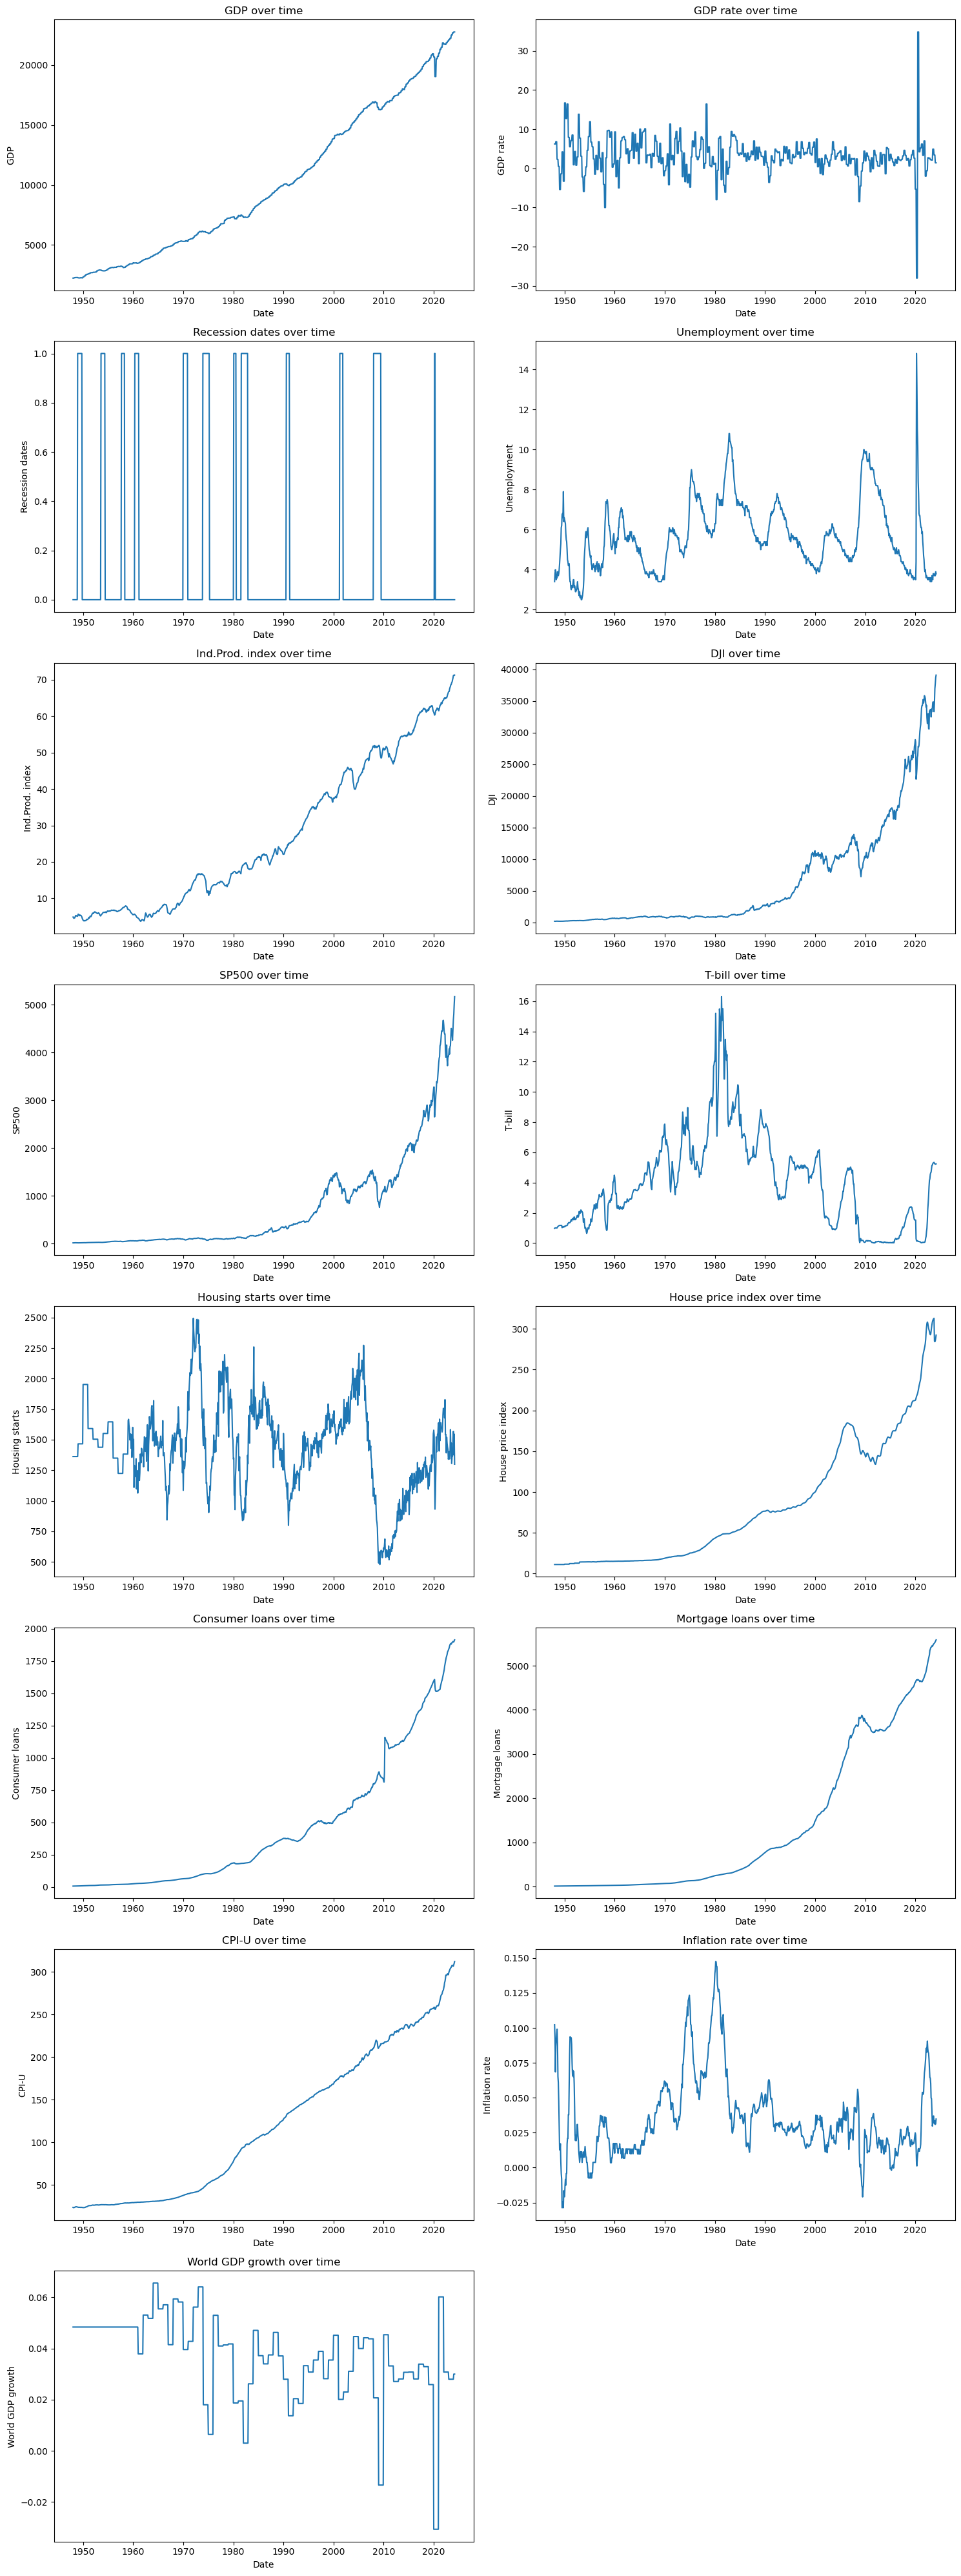

In [6]:
# for column in df.columns:
#     plt.figure(figsize=(12,6))
#     plt.plot(df.index, df[column])
#     plt.title(f'{column} over time')
#     plt.xlabel('Date')
#     plt.ylabel(column)
#     plt.show();
# plt.show();
num_rows = (len(df.columns) + 2 - 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, column in enumerate(df.columns):
    ax = axes[i]
    ax.plot(df.index, df[column])
    ax.set_title(f'{column} over time')
    ax.set_xlabel('Date')
    ax.set_ylabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

#### Distributions

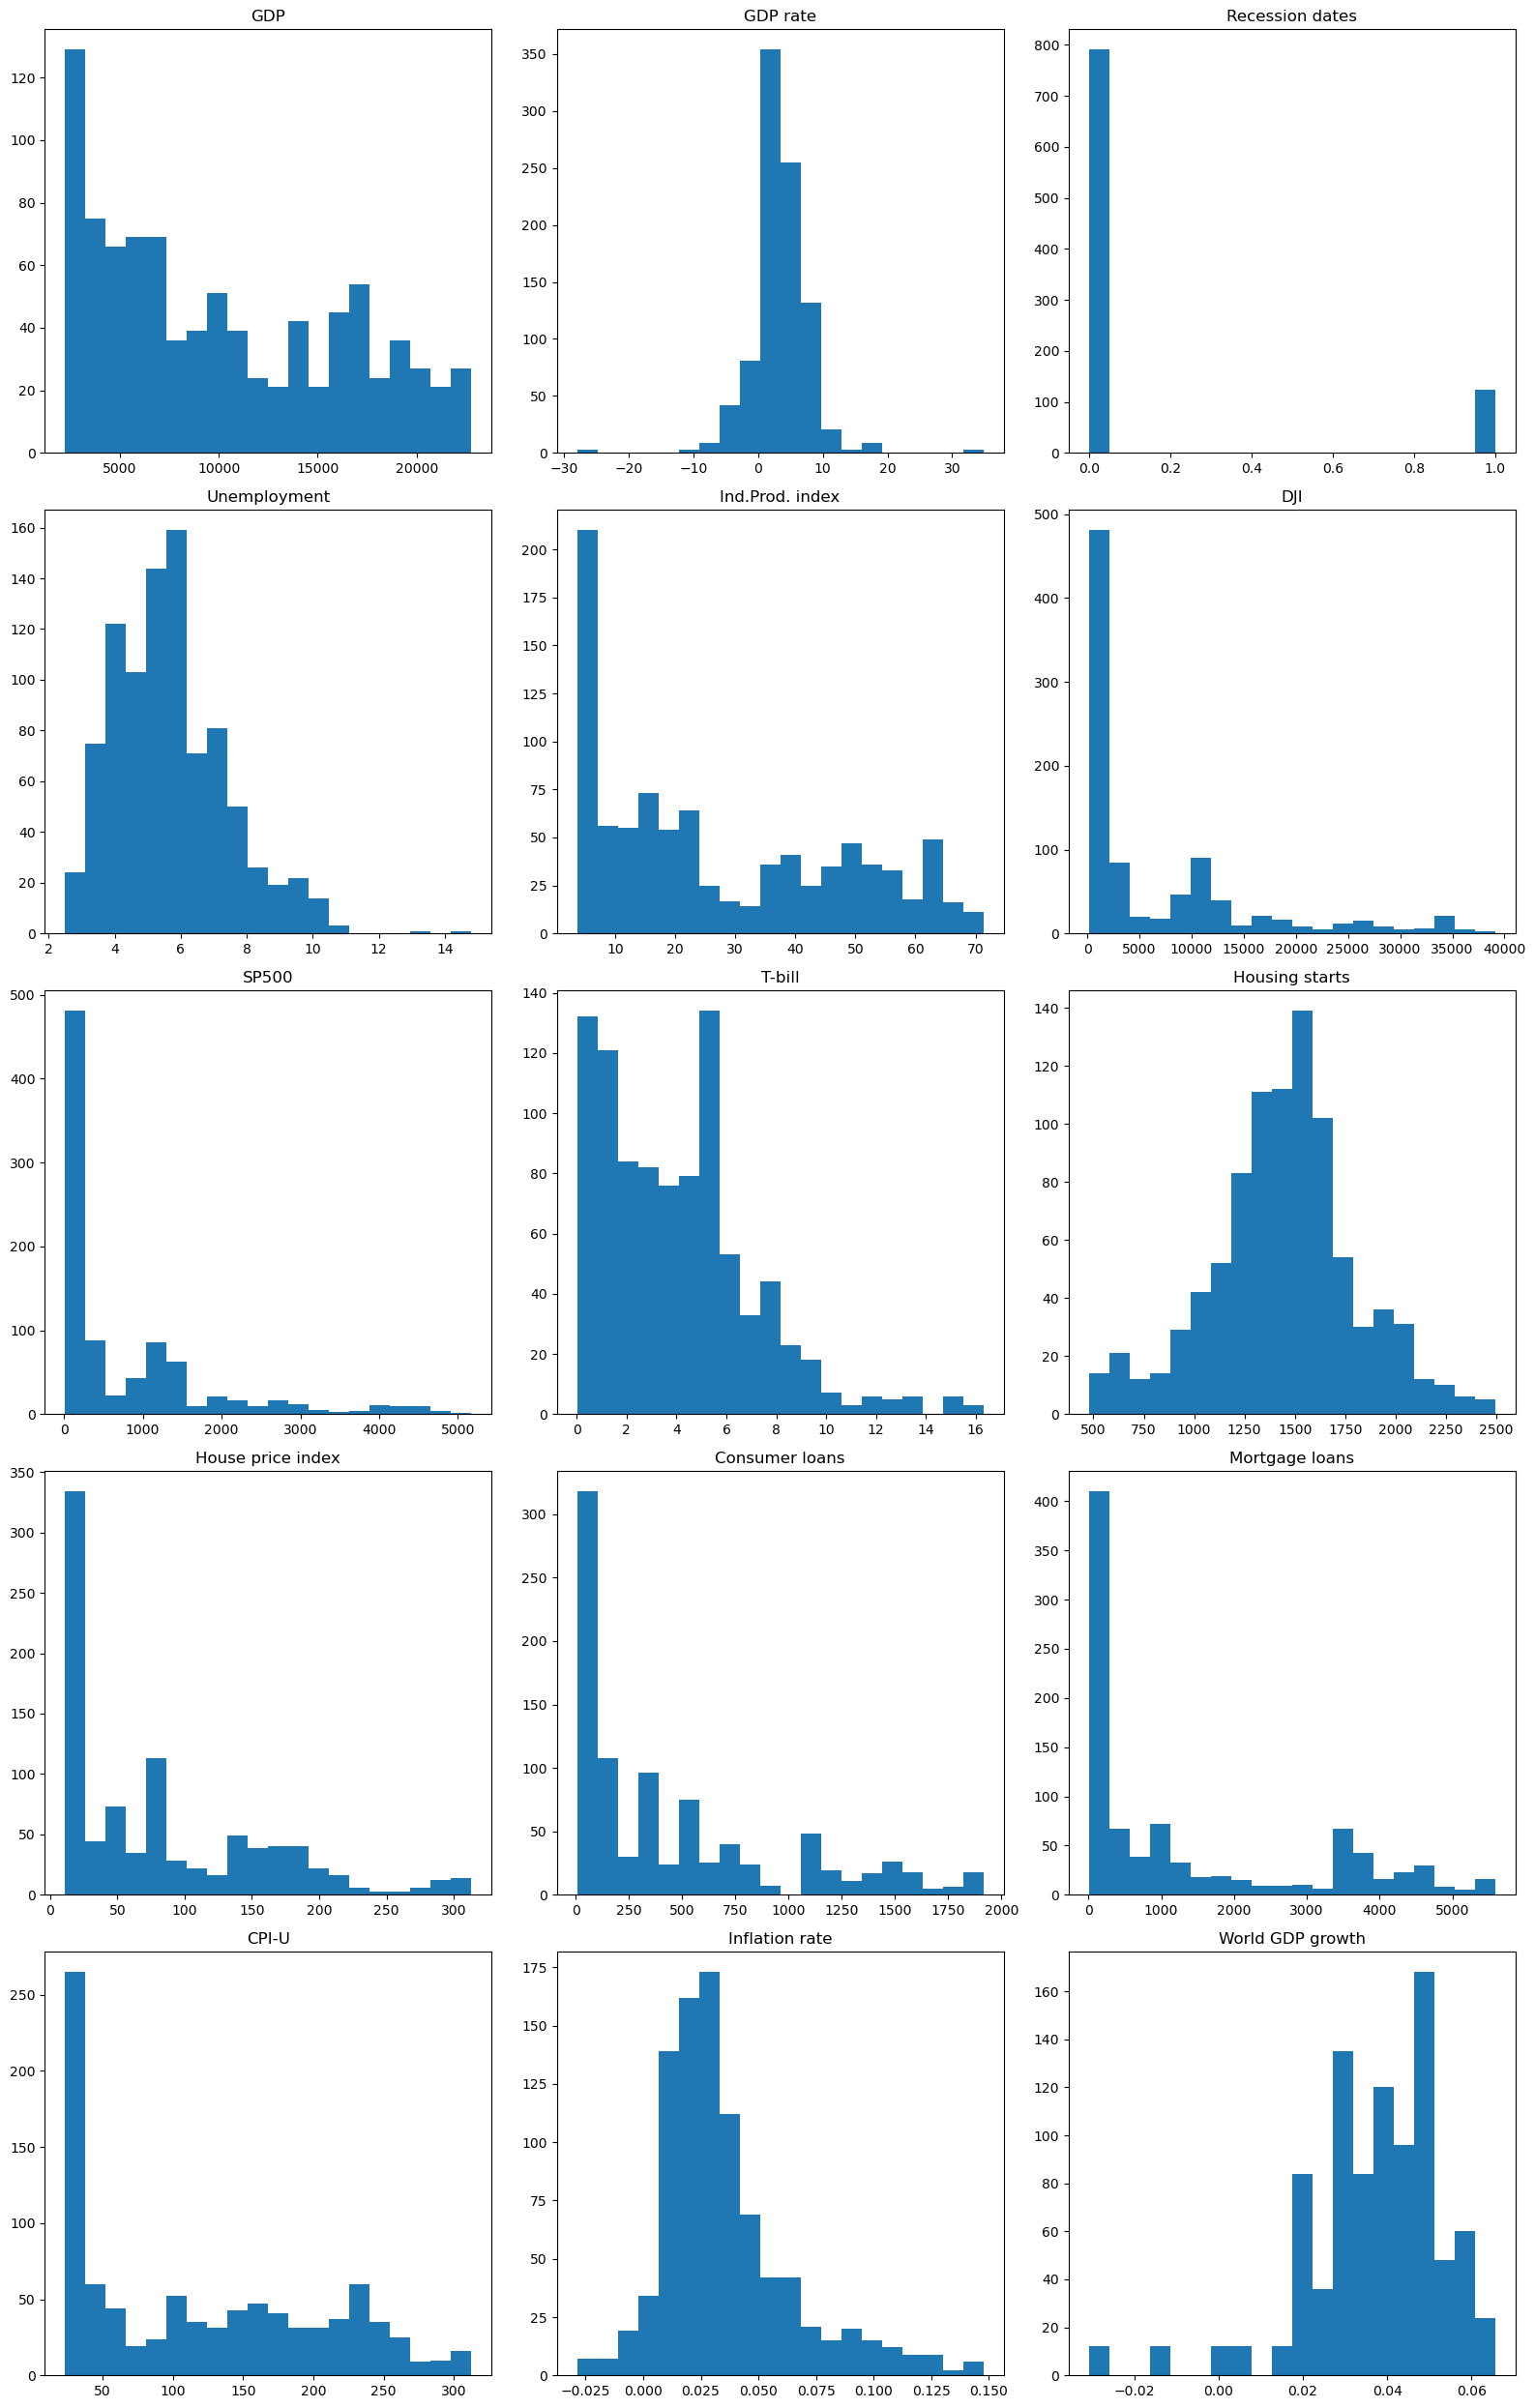

In [7]:
num_features = len(df.columns)
n_cols = 3
n_rows = (num_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))

if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=20)
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

- We have visible outliers in GDP rate variable, but that is a legit fluctuation due to COVID. Otherwise these two show steady increases over time with clear dclines during recessions.
- Same for unemployment 14% -- reaction to COVID time. Most of time it was about 5% which is pretty much nowdays. The parameter has a cyclical nature, with a cycle length of approximately 6-7 years.
- Housing starts are cyclical with drops during recessions.
- House price almost always on the rise, the only significant decline is around 2008 recession.
- Mortgage loan follow the housing starts graph.
- T-bill rates show bimodal distribution.
------------
+ Recession-related: clear spikes in unemployment and drops in GDP rate, DJI, SP500 and also housing starts during recessions.
+ Growth trends: in general there's long-term upward trend in GDP, Industrial production index, DJI and SP500, housing prices, consumer loans, mortgage loans, and Consumer Price index.
+ Fluctuations: significant fluctuations in T-bill rates, housing starts, and the inflation rate linked to economic cycles.


#### Correlations

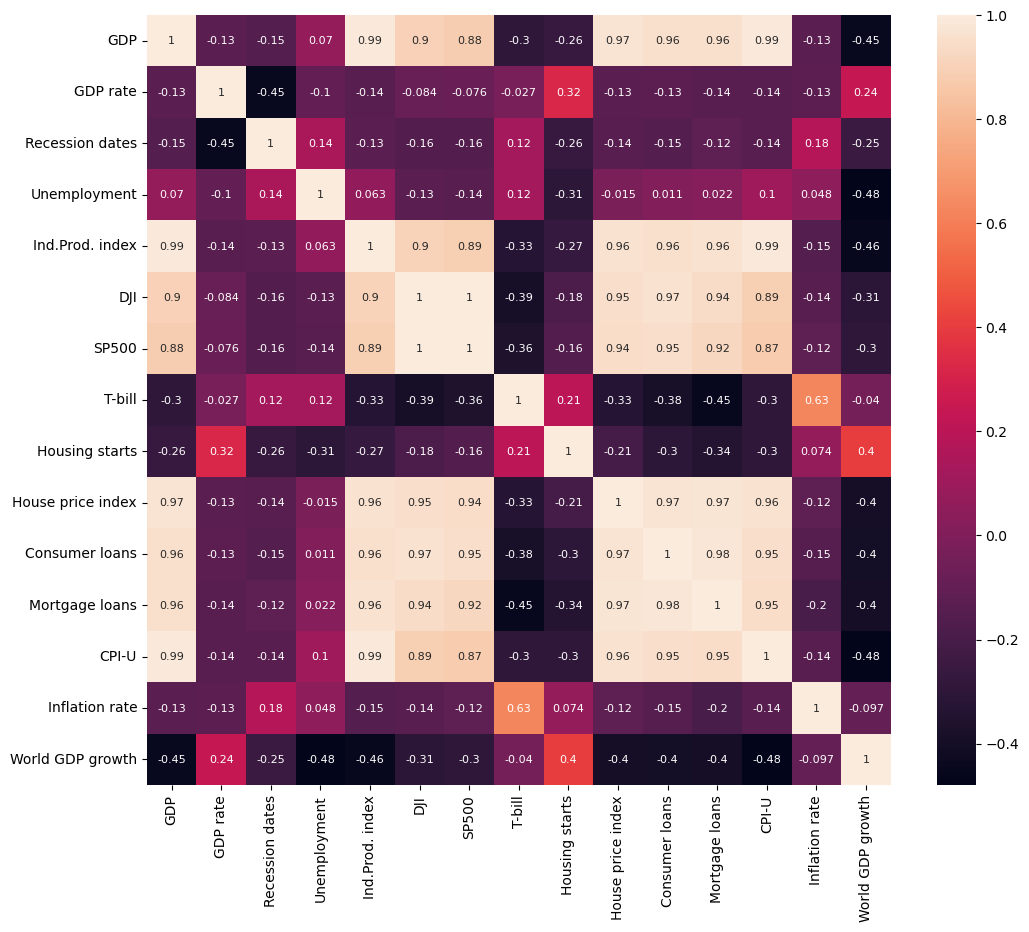

In [8]:
cormat = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(cormat, annot=True, annot_kws={"fontsize":8})
plt.savefig('heatmap.png')
plt.show();

We see here:

+ Recession dates:

It has a moderate negative correlation about -0.5 with GDP rate. The higher GDP growth rates are associated with a lower likelihood of recession. Although, considering the imbalance it may mean nothing.

+ Strong positive correlations:

GDP is highly correlated (0.99+) with Ind.Prod. index, House price index, Consumer loans, Mortgage loans, and CPI-U. This suggests these indicators tend to move together with overall economic output. DJI and SP500 are perfectly correlated (who could imagine?) -- they are both stock market indices.
Consumer loans, Mortgage loans, and House price index are strongly correlated -- 0.97+ -- indicating a strogn relationship between lending and housing markets.

+ Negatives:

T-bill rates show negative correlations with many indicators, particularly strong with Mortgage loans: -0.45. This can suggest that lower interest rates are associated with higher lending activity and economic growth. World GDP var shows moderate negative correlations with many US indicators, which is interesting and might warrant further investigation.

+ Unemployment:

Shows weak correlations with most indicators, with the strongest being a negative correlation (-0.48) with World GDP growth.


+ Inflation rate:

Has a strong positive correlation (0.63) with T-bill rates, suggesting that higher inflation is associated with higher interest rates.
Shows weak correlations with most other indicators.

-------------------------
Notes: 

Multicollinearity: there are many strong correlations between different variables, which suggests potential multicollinearity.

GDP and (annualized) GDP rate: they have a weak negative correlation (-0.13). This negative (although subtle) correlation suggests that as the overall GDP increases over time, the annualized growth rates tend to be slightly lower. This could reflect the economic principle that achieving high growth rates becomes more challenging as an economy matures and grows larger.

The annualized GDP rate shows a stronger negative correlation (-0.45) with recession dates compared to absolute GDP (-0.15). This indicates that the rate of growth is more predictive of recessions than the absolute level of GDP. It reinforces the idea that recessions are more closely tied to changes in economic growth rather than the absolute size of the economy. Probably should build rolling average of that.

>GDP on 7/1/47: 2172.432

>GDP on 10/1/47: 2206.452

>Simple QoQ rate is 1.57%, which for annualized would be (1+1.57/100)^4 - 1 = 6.43%

### Handling non-stationarity

Since we definitely have data that changes over time, we want to check the variables for non-stationarity and if there are non-stationary data, then perform the differencing or transrorm it to make it stationary.

To find it out we're to perform ADF test.

In [9]:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(df['World GDP growth'])
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')

# df.columns

In [10]:
df.head()

,GDP,GDP rate,Recession dates,Unemployment,Ind.Prod. index,DJI,SP500,T-bill,Housing starts,House price index,Consumer loans,Mortgage loans,CPI-U,Inflation rate,World GDP growth
Date,,,,,,,,,,,,,,,
1948-01-01,2239.682,6.2,0,3.4,4.8654,176.26,14.83,0.97,1362.0,11.211582,5.7786,8.8194,23.7,0.10233,0.0484
1948-02-01,2239.682,6.2,0,3.8,4.6504,168.47,14.10,1.00,1362.0,11.211582,5.9030,8.9518,23.5,0.09302,0.0484
1948-03-01,2239.682,6.2,0,4.0,4.5160,169.94,14.30,1.00,1362.0,11.211582,6.0272,9.0946,23.4,0.06849,0.0484
1948-04-01,2276.690,6.8,0,3.9,4.5966,180.05,15.40,1.00,1362.0,11.211582,6.1559,9.2382,23.8,0.08676,0.0484
1948-05-01,2276.690,6.8,0,3.5,4.6235,186.38,16.15,1.00,1362.0,11.211582,6.2822,9.3782,23.9,0.09132,0.0484


#### Differencing

In [11]:
from statsmodels.tsa.stattools import adfuller
features = df.columns.to_list()

for var in features:
    print(f"\nTesting stationarity for {var}...")
    result = adfuller(df[var].dropna())
    if result[1] > 0.05:
        print(f"{var} is non-stationary. Applying differencing...")
        df[f'{var}_diff'] = df[var].diff().dropna()
        result_diff = adfuller(df[f'{var}_diff'].dropna())
        if result_diff[1] <= 0.05:
            print(f"{var}_diff is now stationary.")
        else:
            print(f"{var}_diff is still non-stationary.")
    else:
        print(f"{var} is already stationary.")


Testing stationarity for GDP...
GDP is non-stationary. Applying differencing...
GDP_diff is now stationary.

Testing stationarity for GDP rate...
GDP rate is already stationary.

Testing stationarity for Recession dates...
Recession dates is already stationary.

Testing stationarity for Unemployment...
Unemployment is already stationary.

Testing stationarity for Ind.Prod. index...
Ind.Prod. index is non-stationary. Applying differencing...
Ind.Prod. index_diff is now stationary.

Testing stationarity for DJI...
DJI is non-stationary. Applying differencing...
DJI_diff is now stationary.

Testing stationarity for SP500...
SP500 is non-stationary. Applying differencing...
SP500_diff is now stationary.

Testing stationarity for T-bill...
T-bill is non-stationary. Applying differencing...
T-bill_diff is now stationary.

Testing stationarity for Housing starts...
Housing starts is already stationary.

Testing stationarity for House price index...
House price index is non-stationary. Applyi

In [12]:
df.shape
df.columns

(915, 24)

Index(['GDP', 'GDP rate', 'Recession dates', 'Unemployment', 'Ind.Prod. index',
       'DJI', 'SP500', 'T-bill', 'Housing starts', 'House price index',
       'Consumer loans', 'Mortgage loans', 'CPI-U', 'Inflation rate',
       'World GDP growth', 'GDP_diff', 'Ind.Prod. index_diff', 'DJI_diff',
       'SP500_diff', 'T-bill_diff', 'House price index_diff',
       'Consumer loans_diff', 'Mortgage loans_diff', 'CPI-U_diff'],
      dtype='object')

### Decompose the dates

In [13]:
# df['month'] = df.index.month
# df['year'] = df.index.year
# df['quarter'] = df.index.quarter

In [14]:
# df.head()

In [15]:
df.fillna(0, inplace=True)

### Prepare data for VAR

The idea is to generate next 10 (arbitrary number more or less) periods to use that in the predictions.

We need to pick the proper features (stationary) and build the dataset that we'd want to fit into a model. We'll be using Vector AutoRegression and we need to remove Recession feature (VAR is not inherently meant to work with binary features). Once we have the forecast of the continuous variables, we can use them to predict the binary the recession values with a separate model.

The main thing about VAR is that it is a multi-variate model. Unlike ARIMA or other univariate models it takes into account all time-series features in dataset. The variables are jointly determined, the forecast of each feature is impacted by past values of all the features in model.

To find proper lag needed for model we'll use Akaike Information Criterion of Bayesian Information Criterion.

VAR model will be used to test for Granger Causality to determine whether one time series can predict another.

So plan is:
- Try AIC/BIC
- Fit
- Apply IRF (ok, maybe -- just to measure if variables influence each other)
- Forecast
- Perform Granger Causality test.

#### Creating dataframe

We will create a new dataframe, **df_fit**, with the features needed for VAR only. Meaning, that we don't need say, `T-bill` when we have `T-bill_diff`.

In [53]:
df_fit = df[['GDP_diff', 'GDP rate', 'Unemployment', 'Ind.Prod. index_diff', 'DJI_diff', 'SP500_diff', 'T-bill_diff', 'Housing starts', 'House price index_diff', 'Consumer loans_diff', 'Mortgage loans_diff', 'CPI-U_diff', 'Inflation rate', 'World GDP growth']]
df_fit.head()

,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth
Date,,,,,,,,,,,,,,
1948-01-01,0.000,6.2,3.4,0.0000,0.00,0.00,0.00,1362.0,0.0,0.0000,0.0000,0.0,0.10233,0.0484
1948-02-01,0.000,6.2,3.8,-0.2150,-7.79,-0.73,0.03,1362.0,0.0,0.1244,0.1324,-0.2,0.09302,0.0484
1948-03-01,0.000,6.2,4.0,-0.1344,1.47,0.20,0.00,1362.0,0.0,0.1242,0.1428,-0.1,0.06849,0.0484
1948-04-01,37.008,6.8,3.9,0.0806,10.11,1.10,0.00,1362.0,0.0,0.1287,0.1436,0.4,0.08676,0.0484
1948-05-01,0.000,6.8,3.5,0.0269,6.33,0.75,0.00,1362.0,0.0,0.1263,0.1400,0.1,0.09132,0.0484


#### AIC / BIC

Use it to find the right lag parameter.

In [17]:
from statsmodels.tsa.api import VAR

In [18]:
model = VAR(df_fit)
lag_order_results = model.select_order(maxlags=15)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        31.12       31.19   3.262e+13       31.14
1        17.13      18.25*   2.757e+07       17.56
2        16.36       18.52   1.271e+07       17.18
3        15.39       18.60   4.826e+06       16.62
4        14.89       19.14   2.926e+06      16.51*
5        14.76       20.07   2.595e+06       16.79
6        14.33       20.68   1.687e+06       16.76
7        14.18       21.57   1.451e+06       17.00
8        14.04       22.49   1.280e+06       17.27
9        13.66       23.15   8.787e+05       17.28
10       13.48       24.01   7.392e+05       17.50
11       13.26       24.84   6.032e+05       17.68
12       12.66       25.28   3.345e+05       17.48
13       12.35       26.02   2.499e+05       17.57
14       12.17       26.89   2.144e+05       17.80
15      11.95*       27.72  1.758e+05*       17.97
-------------------------------

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


HQIC (it offers lag 4) is a kind of trade-off between AIC (15) and more simpler BIC (1). So we'll stick to balanced HQIC with lag of 4.

In [19]:
model_fitted = model.fit(4)

#### Check if VAR was suitable

Now check for autocorrelation in residuals, if they demonstrate correlation. If yes, then it means the model has not captured the patterns in data.

In [20]:
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = model_fitted.resid

for col in residuals.columns: # apply the Ljung-Box test for each residual series individually
    print(f"Ljung-Box Test for {col}:")
    lb_test = acorr_ljungbox(residuals[col], lags=[4], return_df=True)
    print(lb_test)
    print("\n")

Ljung-Box Test for GDP_diff:
    lb_stat  lb_pvalue
4  1.301447    0.86113


Ljung-Box Test for GDP rate:
    lb_stat  lb_pvalue
4  4.272415   0.370392


Ljung-Box Test for Unemployment:
    lb_stat  lb_pvalue
4  2.461505   0.651542


Ljung-Box Test for Ind.Prod. index_diff:
    lb_stat  lb_pvalue
4  0.299344   0.989856


Ljung-Box Test for DJI_diff:
    lb_stat  lb_pvalue
4  1.071763   0.898726


Ljung-Box Test for SP500_diff:
    lb_stat  lb_pvalue
4  0.552066   0.968238


Ljung-Box Test for T-bill_diff:
    lb_stat  lb_pvalue
4  4.694162   0.320141


Ljung-Box Test for Housing starts:
    lb_stat  lb_pvalue
4  0.827543   0.934718


Ljung-Box Test for House price index_diff:
    lb_stat  lb_pvalue
4  7.847355   0.097333


Ljung-Box Test for Consumer loans_diff:
    lb_stat  lb_pvalue
4  1.001603   0.909553


Ljung-Box Test for Mortgage loans_diff:
    lb_stat  lb_pvalue
4  6.297973   0.177973


Ljung-Box Test for CPI-U_diff:
    lb_stat  lb_pvalue
4  0.281451    0.99098


Ljung-Box T

No p-values below 0.05, which is good, it means that the residuals do not have significant autocorrealtion. House price index is close to 0.05, but still above it. 

So the VAR model looks well specified.

Now to IRF. 

------------------------

We're skipping IRF since it's not relevant for our perposes. It is necessary when analyzing causality, but in this case we want just to forcast. Besides that the focuse is on the short-term predictions, just several periods, so no need for IRF.

------------------------


In [21]:
irf = model_fitted.irf(10)  # 10 periods ahead
# irf.plot(orth=False)
# plt.savefig('Impulse responses')

Plot is too dense, so instead of plotting every feature, let's plot only some important.

We need to pick variables that are known to be leading indicators of recessions or to be significant economic drivers, like GDP, unemployment rate, interest rates, industrial production.

Then as the impacted vareables should be some of them that are correlated to recession dates, like world gdp growth and housing starts. Preferrence should be to more volatile variables, so that we could see the impact early.

In [55]:
# these IRF plots are irrelevant now

# variables = ['GDP_diff', 'Unemployment', 'Inflation_rate', 'Ind.Prod. index_diff']
# shocks = ['T-bill_diff', 'Housing starts', 'DJI_diff', 'World GDP growth']

# fig, axes = plt.subplots(len(variables), len(shocks), figsize=(15, 10))

# for i, var in enumerate(variables):
#     for j, shock in enumerate(shocks):
#         irf_response = irf.irfs[:, j, i]
#         axes[i, j].plot(irf_response)
#         axes[i, j].set_title(f'{shock} → {var}')
#         axes[i, j].axhline(0, color='black', lw=0.5)
#         axes[i, j].set_xlabel('Periods')
#         axes[i, j].set_ylabel(f'Response of {var}')

# plt.tight_layout()
# plt.savefig('Impulse responses.png')
# plt.show();

### Forecast

In [24]:
steps = 10 # we try to predict next 10 months (periods)

# forecast = model_fitted.forecast(model_fitted.endog[-4:], steps=steps)
forecast = model_fitted.forecast(model_fitted.endog[-4:], steps=steps)

In [25]:
forecast_index = pd.date_range(start=df_fit.index[-1], periods=steps+1, freq='MS')[1:]  # M -- for frequency
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=df_fit.columns)

forecast_df.shape
forecast_df.head()

(10, 14)

,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth
2024-04-01,40.111532,0.694558,3.817500,0.186344,-303.493538,6.062480,-0.099025,1399.395960,4.948254,8.642590,8.462749,1.599551,0.036267,0.028392
2024-05-01,12.592165,0.949457,4.201849,0.332004,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,3.100424,10.856508,1.158854,0.037881,0.026612
2024-06-01,0.996474,0.790519,4.350465,0.328768,195.010535,36.569860,-0.089236,1330.842623,3.671175,2.405622,15.877284,0.685443,0.039427,0.023626
2024-07-01,59.512739,0.974128,4.235608,0.252686,355.160614,56.932356,-0.063497,1356.824669,1.631983,0.443962,20.698718,0.445272,0.040958,0.023115
2024-08-01,117.587720,2.639382,4.008637,0.200429,145.269845,22.684243,-0.020085,1404.842500,0.844639,-0.441631,20.223920,0.386861,0.041936,0.023906


### Plot df_fit (VAR model data) and forecast (VAR forecast) data

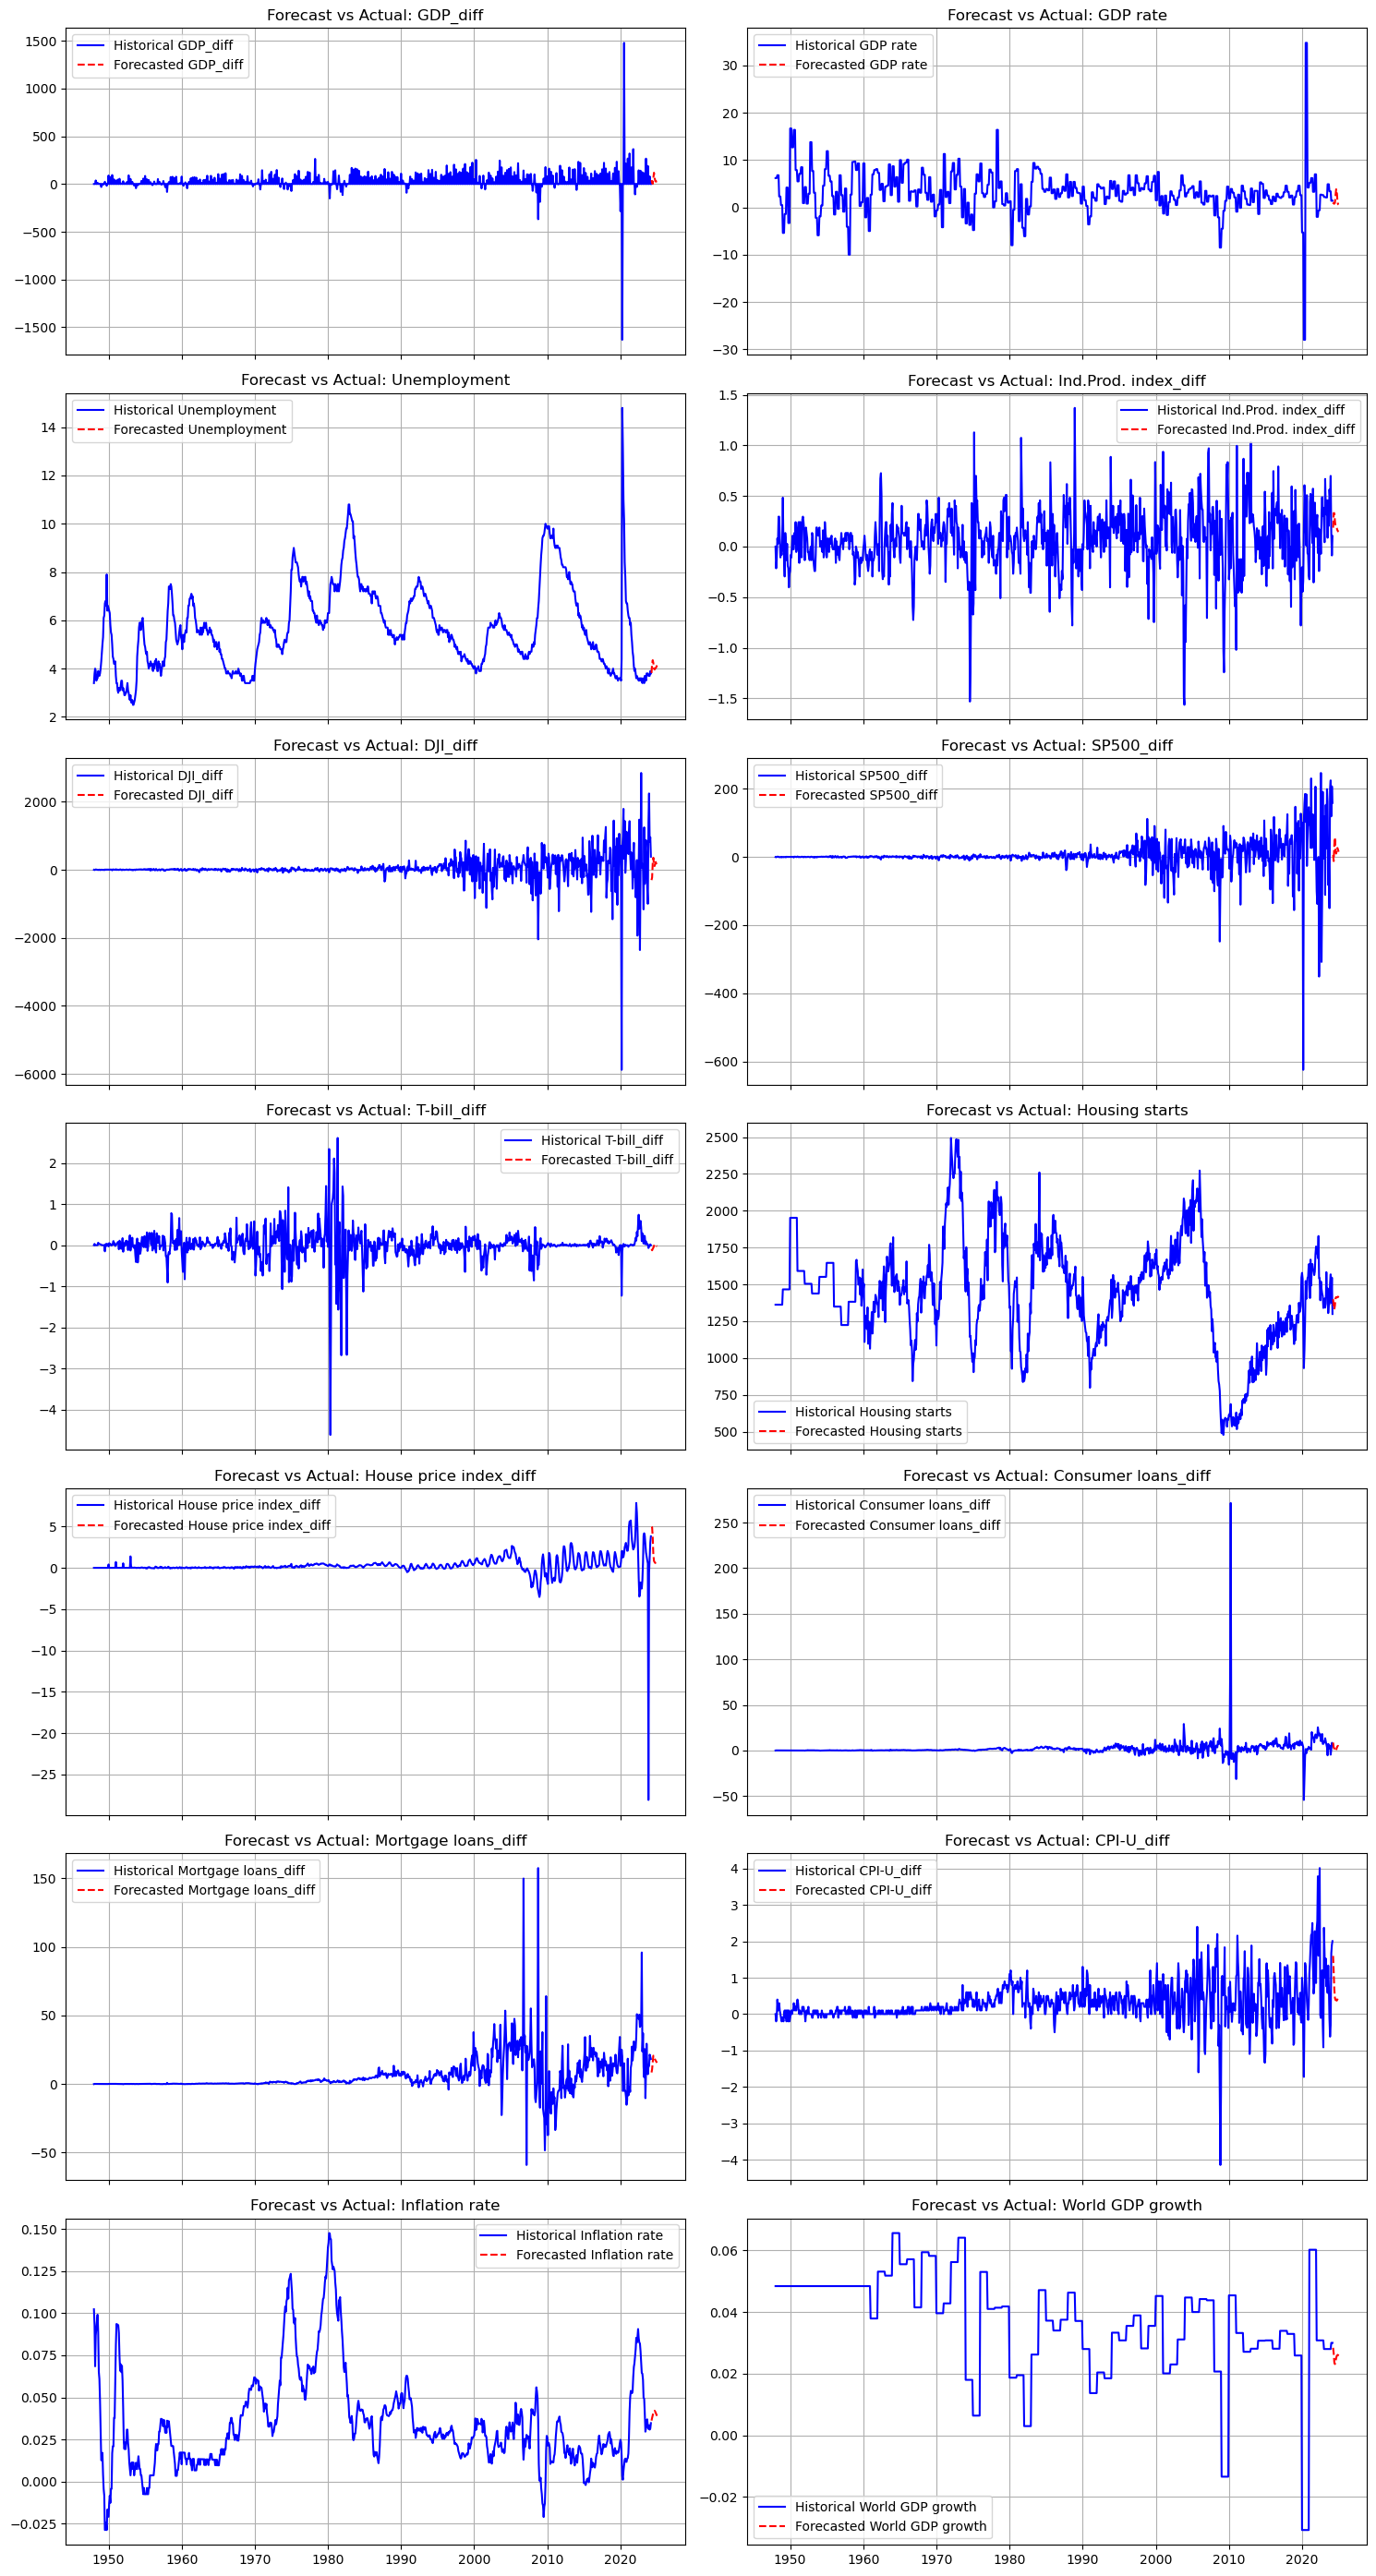

In [26]:
n_cols = 2
n_rows = (len(forecast_df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 28), sharex=True)

axes = axes.flatten()

for i, col in enumerate(forecast_df.columns):
    axes[i].plot(df_fit.index, df_fit[col], label=f'Historical {col}', color='blue')
    axes[i].plot(forecast_df.index, forecast_df[col], label=f'Forecasted {col}', color='red', linestyle='--')
    axes[i].set_title(f'Forecast vs Actual: {col}')
    axes[i].legend()
    axes[i].grid(True)

for i in range(len(forecast_df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show();

it's hard to see something here, in detail, so it's better use dinamic plots that won't overwhelm/floo the canvas.

#### Same but with better interactive visuals ------------------------

In [27]:
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

In [28]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [29]:
# forecast_df.reset_index(inplace=True)

In [30]:
df_fit.head()
# df_fit.columns
# df_fit.info()

,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth
Date,,,,,,,,,,,,,,
1948-01-01,0.000,6.2,3.4,0.0000,0.00,0.00,0.00,1362.0,0.0,0.0000,0.0000,0.0,0.10233,0.0484
1948-02-01,0.000,6.2,3.8,-0.2150,-7.79,-0.73,0.03,1362.0,0.0,0.1244,0.1324,-0.2,0.09302,0.0484
1948-03-01,0.000,6.2,4.0,-0.1344,1.47,0.20,0.00,1362.0,0.0,0.1242,0.1428,-0.1,0.06849,0.0484
1948-04-01,37.008,6.8,3.9,0.0806,10.11,1.10,0.00,1362.0,0.0,0.1287,0.1436,0.4,0.08676,0.0484
1948-05-01,0.000,6.8,3.5,0.0269,6.33,0.75,0.00,1362.0,0.0,0.1263,0.1400,0.1,0.09132,0.0484


In [31]:
# chart
# scatter
# bar
# box
# spread
# ratio
# heatmap
# surface
# histogram
# bubble
# bubble3d
# scatter3d       
# scattergeo
# ohlc
# candle
# pie
# choroplet   
df_fit['Date_copy'] = df_fit.index

@interact
def linear_plot(
    x=list(df_fit.select_dtypes('number').columns), 
    y=list(df_fit.select_dtypes('number').columns)[1:]
):
    df_fit.iplot(kind='bar', x='Date_copy', y=y, mode='markers', xTitle='Date', yTitle=y.title(), title=f'{y.title()} by Months')
    # forecast_df.iplot(kind='bar', x='Date', y=y2, mode='markers', xTitle='Date', yTitle=y.title(), title=f'{y.title()} by Months')
    
# Use the index as x -- not working
# @interact
# def linear_plot(
#     x=list(df_fit.select_dtypes('number').columns), 
#     y=list(df_fit.select_dtypes('number').columns)[1:]
# ):

#     df_fit.iplot(kind='bar', x=df_fit.index, y=y, mode='markers', xTitle='Date', yTitle=y.title(), title=f'{y.title()} by Months')    
    

interactive(children=(Dropdown(description='x', options=('GDP_diff', 'GDP rate', 'Unemployment', 'Ind.Prod. in…

#### var_forecast

In [32]:
historical = df_fit.copy()
var_forecast = forecast_df.copy()

In [33]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [34]:
historical.head()

,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth,Date_copy
Date,,,,,,,,,,,,,,,
1948-01-01,0.000,6.2,3.4,0.0000,0.00,0.00,0.00,1362.0,0.0,0.0000,0.0000,0.0,0.10233,0.0484,1948-01-01
1948-02-01,0.000,6.2,3.8,-0.2150,-7.79,-0.73,0.03,1362.0,0.0,0.1244,0.1324,-0.2,0.09302,0.0484,1948-02-01
1948-03-01,0.000,6.2,4.0,-0.1344,1.47,0.20,0.00,1362.0,0.0,0.1242,0.1428,-0.1,0.06849,0.0484,1948-03-01
1948-04-01,37.008,6.8,3.9,0.0806,10.11,1.10,0.00,1362.0,0.0,0.1287,0.1436,0.4,0.08676,0.0484,1948-04-01
1948-05-01,0.000,6.8,3.5,0.0269,6.33,0.75,0.00,1362.0,0.0,0.1263,0.1400,0.1,0.09132,0.0484,1948-05-01


In [35]:
var_forecast.index.name = 'Date'

In [36]:
var_forecast = var_forecast.sort_values(by='Date')
var_forecast.head(11)

,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth
Date,,,,,,,,,,,,,,
2024-04-01,40.111532,0.694558,3.817500,0.186344,-303.493538,6.062480,-0.099025,1399.395960,4.948254,8.642590,8.462749,1.599551,0.036267,0.028392
2024-05-01,12.592165,0.949457,4.201849,0.332004,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,3.100424,10.856508,1.158854,0.037881,0.026612
2024-06-01,0.996474,0.790519,4.350465,0.328768,195.010535,36.569860,-0.089236,1330.842623,3.671175,2.405622,15.877284,0.685443,0.039427,0.023626
2024-07-01,59.512739,0.974128,4.235608,0.252686,355.160614,56.932356,-0.063497,1356.824669,1.631983,0.443962,20.698718,0.445272,0.040958,0.023115
2024-08-01,117.587720,2.639382,4.008637,0.200429,145.269845,22.684243,-0.020085,1404.842500,0.844639,-0.441631,20.223920,0.386861,0.041936,0.023906
2024-09-01,64.264267,3.838660,3.961420,0.192261,109.199186,10.090060,0.019835,1413.992843,0.685906,0.001848,18.577129,0.384156,0.042150,0.025032
2024-10-01,37.662883,3.489264,4.002213,0.181290,185.222250,18.783154,0.013292,1411.403271,0.616443,2.906629,17.768419,0.369617,0.041582,0.025787
2024-11-01,24.337879,1.522347,4.030635,0.163121,228.074127,26.673213,-0.013556,1412.039243,0.457414,4.566269,16.990189,0.402775,0.040757,0.026002
2024-12-01,27.027917,0.684962,4.072192,0.151041,162.953644,21.993518,-0.020718,1416.906944,0.436516,5.109165,16.208063,0.445212,0.039858,0.025969


In [37]:
combined_df = pd.concat([historical, var_forecast]).sort_values('Date')

# wowrk w/ combined df
combined_df['Data_Type'] = 'Historical'

# this makes 'forecast' on both sides of timeline
combined_df.loc[combined_df.index.isin(var_forecast.index), 'Data_Type'] = 'Forecast'

In [38]:
combined_df.head()

,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth,Date_copy,Data_Type
Date,,,,,,,,,,,,,,,,
1948-01-01,0.000,6.2,3.4,0.0000,0.00,0.00,0.00,1362.0,0.0,0.0000,0.0000,0.0,0.10233,0.0484,1948-01-01,Historical
1948-02-01,0.000,6.2,3.8,-0.2150,-7.79,-0.73,0.03,1362.0,0.0,0.1244,0.1324,-0.2,0.09302,0.0484,1948-02-01,Historical
1948-03-01,0.000,6.2,4.0,-0.1344,1.47,0.20,0.00,1362.0,0.0,0.1242,0.1428,-0.1,0.06849,0.0484,1948-03-01,Historical
1948-04-01,37.008,6.8,3.9,0.0806,10.11,1.10,0.00,1362.0,0.0,0.1287,0.1436,0.4,0.08676,0.0484,1948-04-01,Historical
1948-05-01,0.000,6.8,3.5,0.0269,6.33,0.75,0.00,1362.0,0.0,0.1263,0.1400,0.1,0.09132,0.0484,1948-05-01,Historical


In [39]:
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

@interact
def linear_plot(
    y=list(combined_df.select_dtypes('number').columns)
):
    # historical data
    trace_historical = go.Scatter(
        x=combined_df[combined_df['Data_Type'] == 'Historical'].index,
        y=combined_df[combined_df['Data_Type'] == 'Historical'][y],
        mode='lines+markers',
        name='Historical'
    )
    # new forcasted data
    trace_forecast = go.Scatter(
        x=combined_df[combined_df['Data_Type'] == 'Forecast'].index,
        y=combined_df[combined_df['Data_Type'] == 'Forecast'][y],
        mode='lines+markers',
        name='Forecast',
        line=dict(dash='dash')
    )
    
    layout = go.Layout(
        title=f'{y.title()} by Months',
        xaxis=dict(title='Date'),
        yaxis=dict(title=y.title()),
        legend=dict(x=0, y=1.1, orientation='h')
    )
    
    fig = go.Figure(data=[trace_historical, trace_forecast], layout=layout)
    fig.show();

interactive(children=(Dropdown(description='y', options=('GDP_diff', 'GDP rate', 'Unemployment', 'Ind.Prod. in…

#### ------------------------------- 

## ARIMA

### Unemployment

To understand  how good the model performs we need a baseline to compare that model to. ARIMA will be one of such baseline models. Unemployment here is just for example.

In [40]:
df_test = df['Unemployment']
df_test.head()
df_test.tail()

Date
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
Name: Unemployment, dtype: float64

Date
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
Name: Unemployment, dtype: float64

In [41]:
# from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima

In [42]:
# def test_stationarity(timeseries):
#     result = adfuller(timeseries, autolag='AIC')
#     print('ADF Statistic:', result[0])
#     print('p-value:', result[1])
#     print('Critical Values:', result[4])

# test_stationarity(df_test)

In [43]:
model = auto_arima(
    df_test, start_p=0, start_q=0, max_p=5, max_q=5, m=12,
    start_P=0, seasonal=True, d=1, D=1, trace=True,
    error_action='ignore', suppress_warnings=True, stepwise=True
)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1652.266, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1390.682, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1653.111, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1292.834, Time=0.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.99 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1293.033, Time=0.57 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1293.397, Time=0.76 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=2.82 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1292.638, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1390.490, Time=0.31 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=5.57 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  915
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -642.319
Date:                             Sat, 21 Sep 2024   AIC                           1292.638
Time:                                     11:16:43   BIC                           1311.857
Sample:                                 01-01-1948   HQIC                          1299.979
                                      - 03-01-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0539      0.010      5.147      0.000       0.033       0.074
ar.S.L12      -0.6688      0.006   -120.031      0.000      -0.680      -0.658
ar.S.L24      -0.3257      0.005    -59.431      0.000      -0.336      -0.315
sigma2         0.2416      0.001    208.229      0.000       0.239       0.244
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1949200.40
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               6.32   Skew:                             9.15
Prob(H) (two-sided):                  0.00   Kurtosis:                       230.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model appears to fit the data well in terms of capturing the autoregressive and other components. 

The significant coefficients indicate that the model is capturing important patterns in the data, but has extreme values in skewness (high skew and kurtosis). That means that there are some outliers in data that do not fit the pattern the model tries to capture. But it's not that crucial if we want to forecast only next 10 steps.

In [44]:
# model.order # 0,1,1
# model.seasonal_order # 2,1,0,12
df_test = df_test.asfreq('MS')

p, d, q = 0,1,1
P, D, Q, m = 2,1,0,12

arima_model = ARIMA(df_test, order=(p,d,q), seasonal_order=(P,D,Q,m))
results = arima_model.fit()

forecast = results.forecast(steps=10)

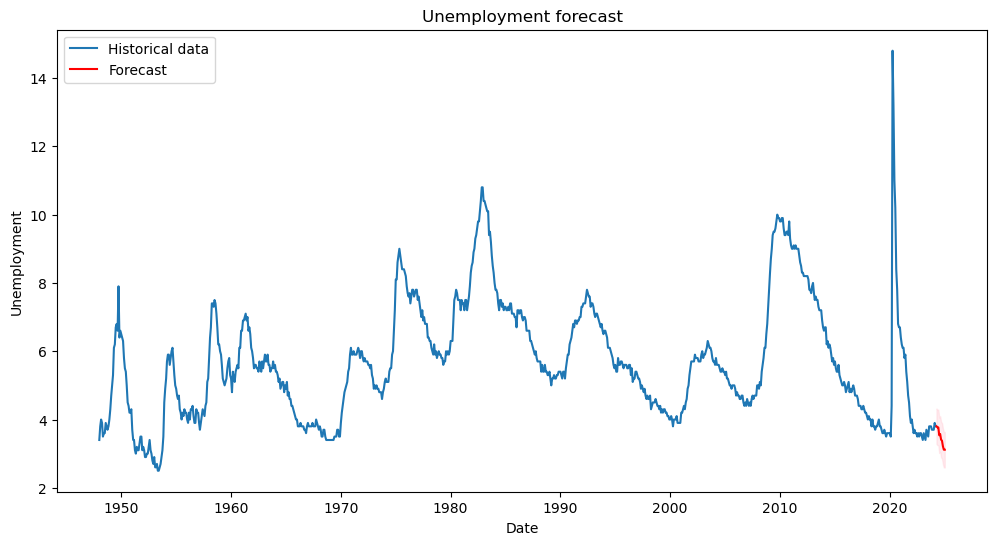

In [45]:
plt.figure(figsize=(12,6))

plt.plot(df_test.index, df_test, label='Historical data')
plt.plot(forecast.index, forecast, color='red', label='Forecast')

plt.fill_between(forecast.index, forecast - 1.96 * forecast.std(), forecast + 1.96 * forecast.std(), color='pink', alpha=0.3)

plt.title('Unemployment forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment')

plt.legend()
plt.show();

In [46]:
# @interact
# def arima_unimpl(
#     x=list(df_test.select_dtypes('number').columns), 
#     y=list(df_test.select_dtypes('number').columns)[1:]
# ):
#     forecast.iplot(kind='bar', x='Date', y=y, mode='markers', xTitle='Date', yTitle=y.title(), title=f'{y.title()} by Months')

In [47]:
forecast
forecast.info()

2024-04-01    3.802275
2024-05-01    3.769610
2024-06-01    3.769062
2024-07-01    3.538775
2024-08-01    3.574728
2024-09-01    3.410132
2024-10-01    3.379298
2024-11-01    3.215891
2024-12-01    3.116439
2025-01-01    3.114702
Freq: MS, Name: predicted_mean, dtype: float64

<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2024-04-01 to 2025-01-01
Freq: MS
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


### Combine Unemploiment data feom ARIMA, VAR and Real data in joint table

In [48]:
real_unempl = [3.9, 4, 4.1, 4.3, 4.2, 0, 0, 0, 0, 0] # April-Aug US Bureau of labor stat. https://data.bls.gov/timeseries/LNS14000000

In [49]:
forecast

2024-04-01    3.802275
2024-05-01    3.769610
2024-06-01    3.769062
2024-07-01    3.538775
2024-08-01    3.574728
2024-09-01    3.410132
2024-10-01    3.379298
2024-11-01    3.215891
2024-12-01    3.116439
2025-01-01    3.114702
Freq: MS, Name: predicted_mean, dtype: float64

In [50]:
date_range = pd.date_range(start='2024-04-01', end='2025-01-01', freq='MS')
tab = {'Date':date_range,
        'Actual data': real_unempl,
        'ARIMA forecast':forecast.round(1),
        'VAR forecast': var_forecast['Unemployment'].to_list()
      }

# tab
tab_df = pd.DataFrame(tab)
tab_df['VAR forecast'] = tab_df['VAR forecast'].round(1)
tab_df.drop(columns='Date', inplace=True)

tab_df['A-A dif'] = abs(tab_df['Actual data']-tab_df['ARIMA forecast'])
tab_df['A-V dif'] = abs(tab_df['Actual data']-tab_df['VAR forecast'])

# tab_df

comparison = tab_df[['Actual data','ARIMA forecast', 'A-A dif', 'VAR forecast', 'A-V dif']]
comparison

,Actual data,ARIMA forecast,A-A dif,VAR forecast,A-V dif
2024-04-01,3.9,3.8,0.1,3.8,0.1
2024-05-01,4.0,3.8,0.2,4.2,0.2
2024-06-01,4.1,3.8,0.3,4.4,0.3
2024-07-01,4.3,3.5,0.8,4.2,0.1
2024-08-01,4.2,3.6,0.6,4.0,0.2
2024-09-01,0.0,3.4,3.4,4.0,4.0
2024-10-01,0.0,3.4,3.4,4.0,4.0
2024-11-01,0.0,3.2,3.2,4.0,4.0
2024-12-01,0.0,3.1,3.1,4.1,4.1
2025-01-01,0.0,3.1,3.1,4.1,4.1


So far VAR demonstrates much better results than just ARIMA when comparing Unemployment forcast results on more distant horizons and similar on closed horizons.

In [51]:
var_forecast.head(11)

,GDP_diff,GDP rate,Unemployment,Ind.Prod. index_diff,DJI_diff,SP500_diff,T-bill_diff,Housing starts,House price index_diff,Consumer loans_diff,Mortgage loans_diff,CPI-U_diff,Inflation rate,World GDP growth
Date,,,,,,,,,,,,,,
2024-04-01,40.111532,0.694558,3.817500,0.186344,-303.493538,6.062480,-0.099025,1399.395960,4.948254,8.642590,8.462749,1.599551,0.036267,0.028392
2024-05-01,12.592165,0.949457,4.201849,0.332004,-225.513754,-11.983299,-0.125495,1352.048108,4.907250,3.100424,10.856508,1.158854,0.037881,0.026612
2024-06-01,0.996474,0.790519,4.350465,0.328768,195.010535,36.569860,-0.089236,1330.842623,3.671175,2.405622,15.877284,0.685443,0.039427,0.023626
2024-07-01,59.512739,0.974128,4.235608,0.252686,355.160614,56.932356,-0.063497,1356.824669,1.631983,0.443962,20.698718,0.445272,0.040958,0.023115
2024-08-01,117.587720,2.639382,4.008637,0.200429,145.269845,22.684243,-0.020085,1404.842500,0.844639,-0.441631,20.223920,0.386861,0.041936,0.023906
2024-09-01,64.264267,3.838660,3.961420,0.192261,109.199186,10.090060,0.019835,1413.992843,0.685906,0.001848,18.577129,0.384156,0.042150,0.025032
2024-10-01,37.662883,3.489264,4.002213,0.181290,185.222250,18.783154,0.013292,1411.403271,0.616443,2.906629,17.768419,0.369617,0.041582,0.025787
2024-11-01,24.337879,1.522347,4.030635,0.163121,228.074127,26.673213,-0.013556,1412.039243,0.457414,4.566269,16.990189,0.402775,0.040757,0.026002
2024-12-01,27.027917,0.684962,4.072192,0.151041,162.953644,21.993518,-0.020718,1416.906944,0.436516,5.109165,16.208063,0.445212,0.039858,0.025969


In [52]:
# Save the combined_df (VAR forecasted + historical data) into file
combined_df.to_csv('recession_dataset_var.csv')